In [1]:
source("../../utils.R")
library(Seurat)

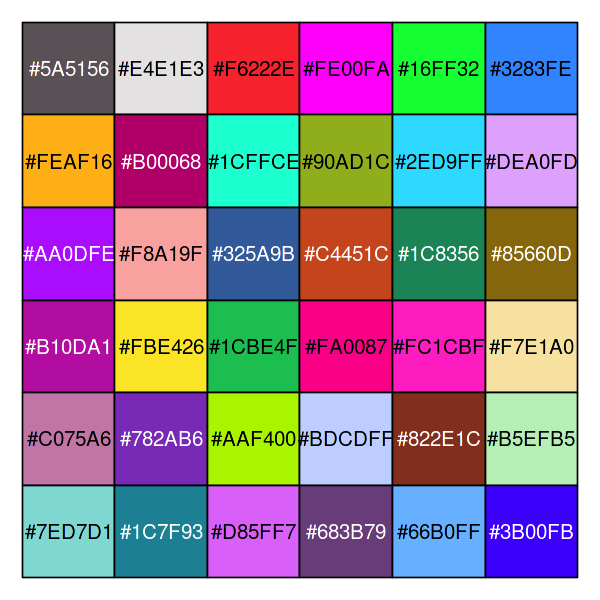

In [2]:
options(repr.plot.width=5, repr.plot.height=5)
par(mfrow=c(1,1))

show_col(my_col_polychrome)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


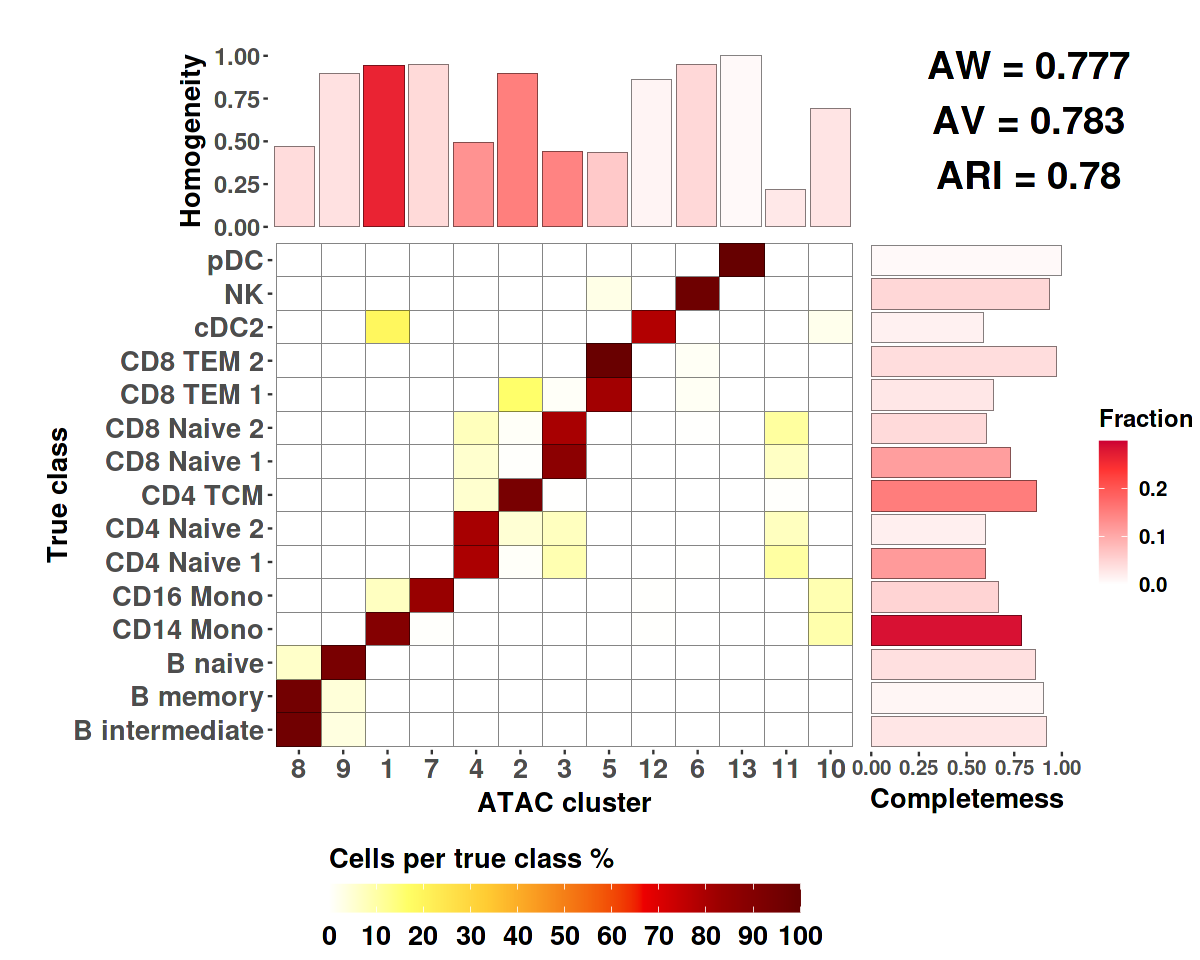

In [3]:
# check if the value of a,b,c is appropriate
options(repr.plot.width=10, repr.plot.height=8)

ground_truth_file <- '../../partition_real_life_examples/PBMC_ground_truth.tsv'
clustering_file <- '../../PWC/PBMC_aggregation_ndim15_seed0_r0.35.tsv'

df_label <- read.table(clustering_file, header = T, sep="\t", comment.char = "")
df_ground_truth <- read.table(ground_truth_file, header = T, sep="\t", comment.char = "")

df <- merge(df_label, df_ground_truth, by="barcode")
ground_truth <- as.factor(df$ground_truth)
clusterings <- as.factor(df$clusterings)

p2 <- cross_table_plot(ground_truth, clusterings, a=2, b=3.8, c=3.1, m=0, n=0.3)
p2

In [4]:
sobj_file <- "../../PWC/PBMC_aggregation_ndim15_sobj_SNN.RDS"
sobj <- readRDS(sobj_file)

In [29]:
df_pwc <- data.frame(k=c(), label=c(), pwc=c())
for(k in c(5, 10, 15, 20, 25, 30)){
    g <- graph_from_sobj(sobj, n_neighbors=k)
    for(label_idx in 1:length(unique(ground_truth))){
        res <- pwc(g, ground_truth, label_idx)$j1_frac
        df_pwc <- rbind(df_pwc, data.frame(k=k, label=unique(ground_truth)[label_idx],pwc=res))
    }
}

Computing nearest neighbor graph



Computing SNN

Computing nearest neighbor graph

Computing SNN

Computing nearest neighbor graph

Computing SNN

Computing nearest neighbor graph

Computing SNN

Computing nearest neighbor graph

Computing SNN

Computing nearest neighbor graph

Computing SNN



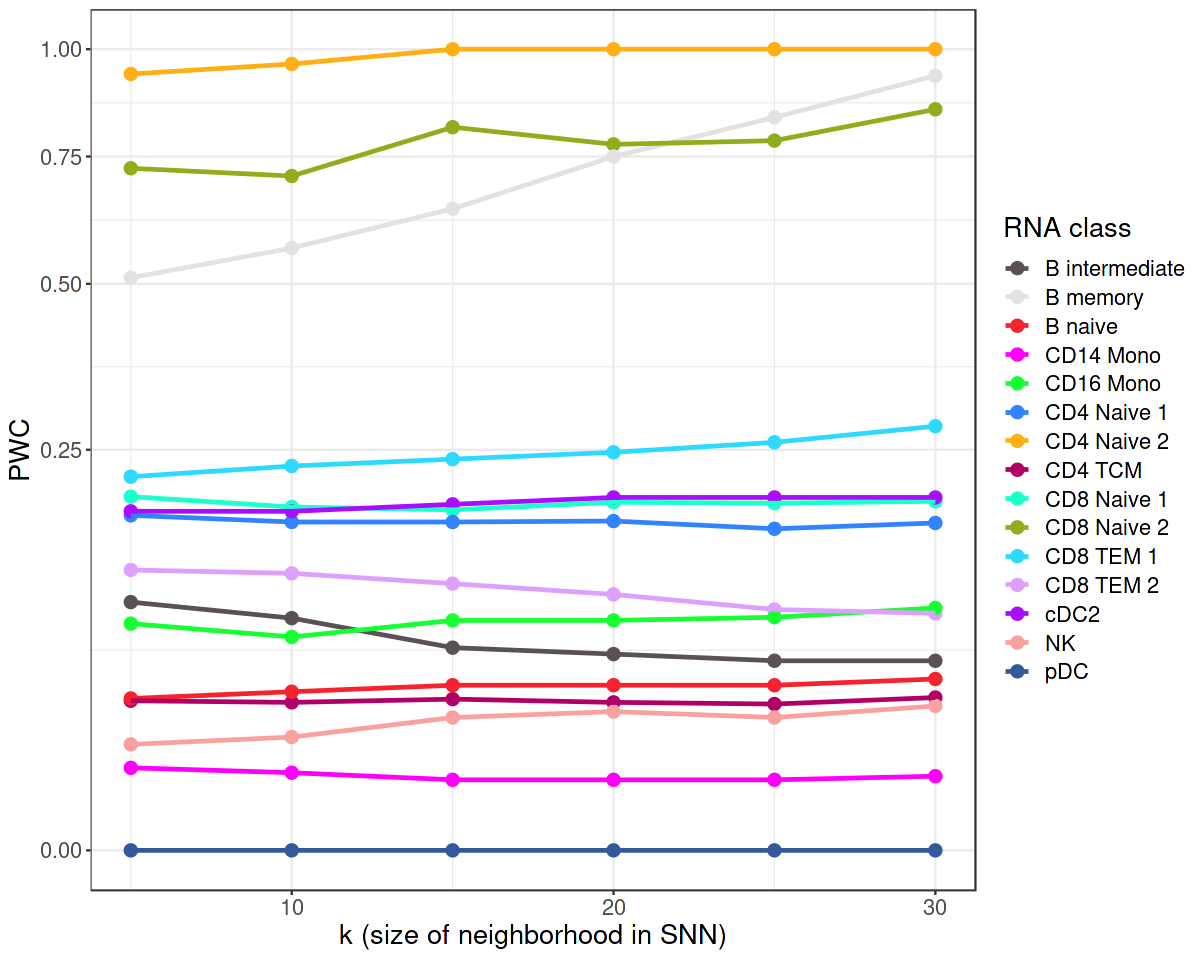

In [66]:
p1 <- df_pwc %>% ggplot(aes(x=k, y=pwc, color=label)) + 
geom_point(size=3) + 
geom_line(size=1) +
theme_bw() +
labs(x="k (size of neighborhood in SNN)", y="PWC", color="RNA class") +
scale_color_manual(values=my_col_polychrome) +
scale_y_sqrt() +
theme(text = element_text(size = 16))
p1

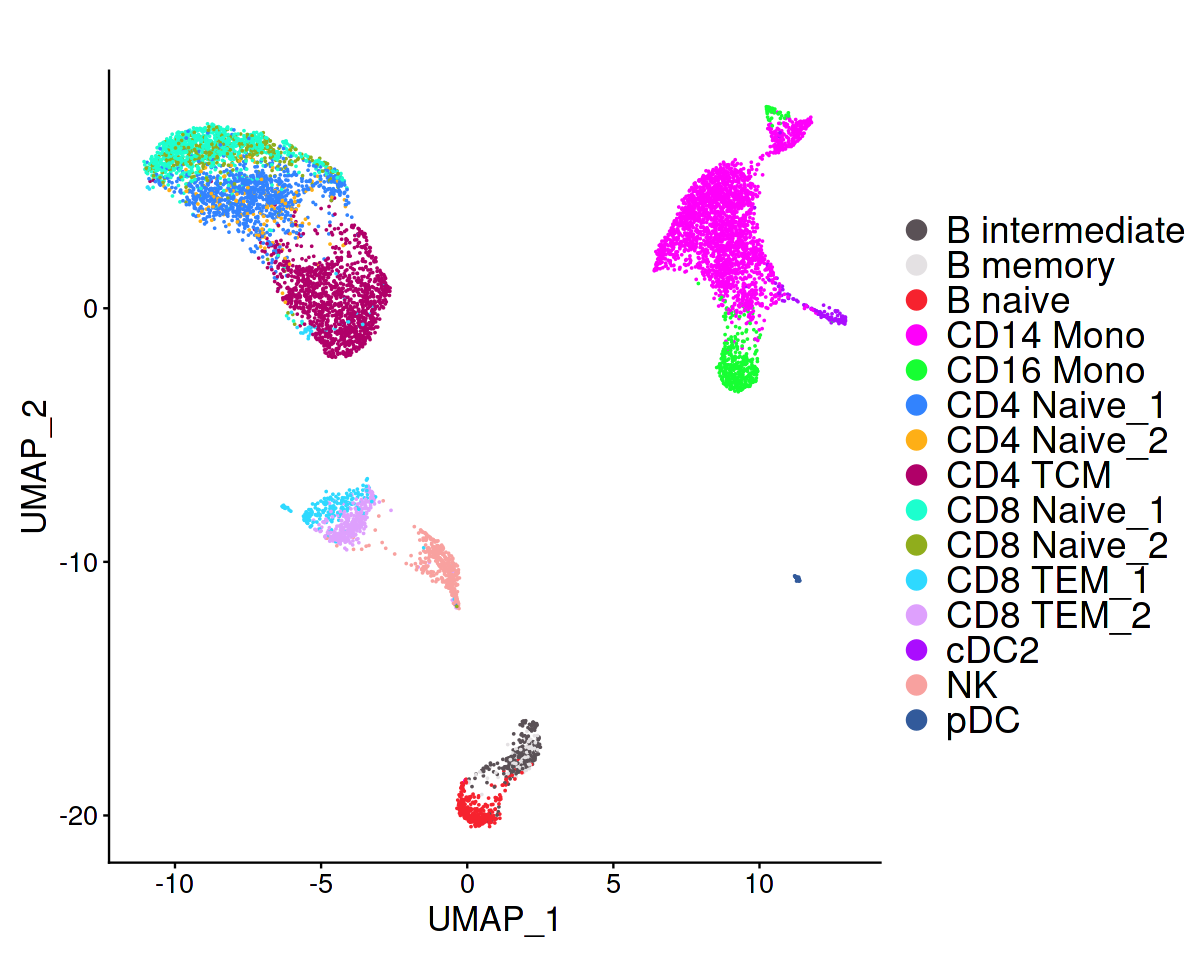

In [11]:
p3 <- DimPlot(sobj, reduction = "umap", label = F, repel=T, 
    group.by = "ground_truth", cols="polychrome", pt.size=0.001)  +
    theme(plot.title = element_text(face = "bold", size=24), 
        text=element_text(size=20), 
        legend.text = element_text(size = 22),
        axis.text = element_text(size = 16)) + ggtitle("") +
guides(color = guide_legend(override.aes = list(size = 5)))

p3

In [70]:
pdf("pwc_k.pdf", width=7, height=6)
plot(p1)
dev.off() 

png 
  2

In [64]:
pdf("agg_PBMC_cross_table.pdf", width=9, height=8)
plot(p2)
dev.off() 

png 
  2

In [12]:
pdf("agg_PBMC_UMAP.pdf", width=7, height=6)
plot(p3)
dev.off() 

png 
  2